In [2]:
import glob
from PIL import Image
import numpy as np
import cv2

from image_processing import extract_quads, extract_rects, extract_polygons

(240, 320)


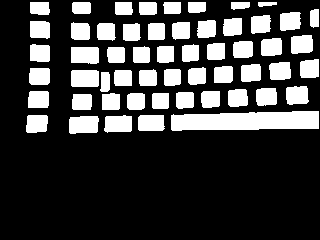

In [93]:
paths = glob.glob("../blender/masks/*.png")

image = Image.open(paths[67]).convert("L").resize((320, 240))
mask = (np.array(image) > 1).astype("uint8")
print(mask.shape)
Image.fromarray(255 * mask)

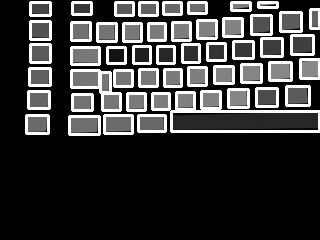

In [94]:
newimg = np.array(image)
for quad in extract_rects(mask):
    x, y, w, h = quad
    cv2.rectangle(newimg, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(newimg)

In [97]:
quad

array([[[30,  2]],

       [[31, 13]],

       [[48, 14]],

       [[48,  2]]], dtype=int32)

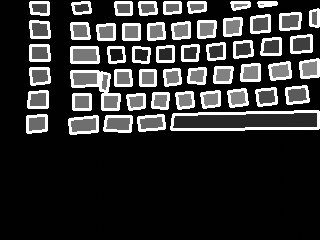

In [95]:
newimg = np.array(image)
for quad in extract_quads(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)

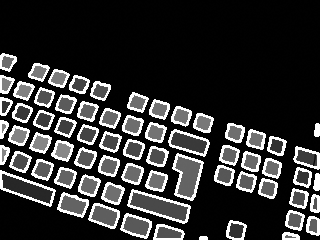

In [16]:
newimg = np.array(image)
for quad in extract_polygons(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)